In [6]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set_theme()

## Electricity

In [8]:
e_df = pd.read_pickle('output/day_ahead_price_electricity.pkl')

In [3]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17520 non-null  float64
dtypes: float64(1)
memory usage: 273.8 KB


In [4]:
e_df.head(24)

,price
Time,
2022-01-01 01:00:00,124.70
2022-01-01 02:00:00,124.70
2022-01-01 03:00:00,134.00
2022-01-01 04:00:00,58.80
2022-01-01 05:00:00,37.67
2022-01-01 06:00:00,39.70
2022-01-01 07:00:00,40.59
2022-01-01 08:00:00,43.26
2022-01-01 09:00:00,49.66


In [5]:
first_hour_of_day = e_df[e_df.index.hour == 1]['price']

# Step 2: Calculate the k-th autocorrelation (e.g., for k=5)
k = 1
autocorr_first_hour = first_hour_of_day.autocorr(lag=k)

print(f'{k}-th autocorrelation for the first hour of the day: {autocorr_first_hour}')

1-th autocorrelation for the first hour of the day: 0.9090704132582229


In [6]:
# Create a new column for the hour of the day
e_df['hour'] = e_df.index.hour

In [7]:

# Define a custom aggregation function
def aggregate_stats(group):
    return {
        'mean': round(group.mean(),2),
        'std': round(group.std(),2),
        'skewness': round(skew(group),2),
        'kurtosis': round(kurtosis(group),2)
    }


In [8]:

# Group by hour and apply the aggregation function
hourly_stats = e_df.groupby('hour')['price'].apply(aggregate_stats)

# Convert the result into a DataFrame
hourly_stats_df = pd.DataFrame(hourly_stats.tolist(), index=hourly_stats.index)

print(hourly_stats_df)

                    0
hour                 
0    mean      169.09
     std       111.06
     skewness    1.52
     kurtosis    2.41
1    mean      163.25
...               ...
22   kurtosis    2.77
23   mean      189.48
     std       122.03
     skewness    1.56
     kurtosis    2.52

[96 rows x 1 columns]


In [9]:
hourly_stats_df.head()

0
hour                 
0    mean      169.09
     std       111.06
     skewness    1.52
     kurtosis    2.41
1    mean      163.25

In [10]:
# Convert the result to a wide format
hourly_stats_wide = hourly_stats_df.unstack()

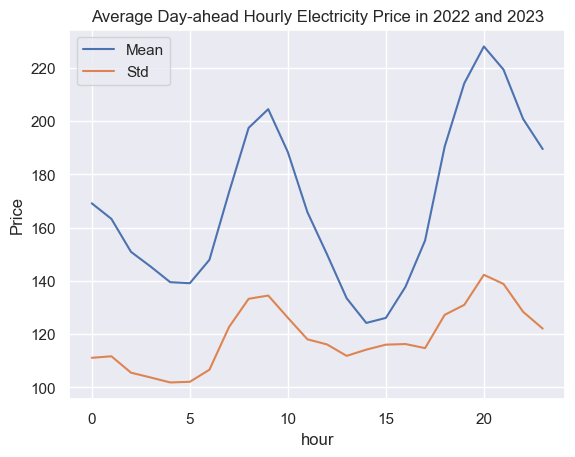

In [47]:
sns.lineplot(hourly_stats_wide[0]['mean'], label = 'Mean').set_title('Average Day-ahead Hourly Electricity Price in 2022 and 2023')
sns.lineplot(hourly_stats_wide[0]['std'], label = 'Std')
plt.ylabel("Price")
plt.legend()

sns.lineplot(hourly_stats_wide[0]['std']).set_title('Average Standard Deviation of Day-ahead Hourly Electricity Price in 2022 and 2023')

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
e_df.head()

,price,hour
Time,,
2022-01-01 01:00:00,124.70,1
2022-01-01 02:00:00,124.70,2
2022-01-01 03:00:00,134.00,3
2022-01-01 04:00:00,58.80,4
2022-01-01 05:00:00,37.67,5


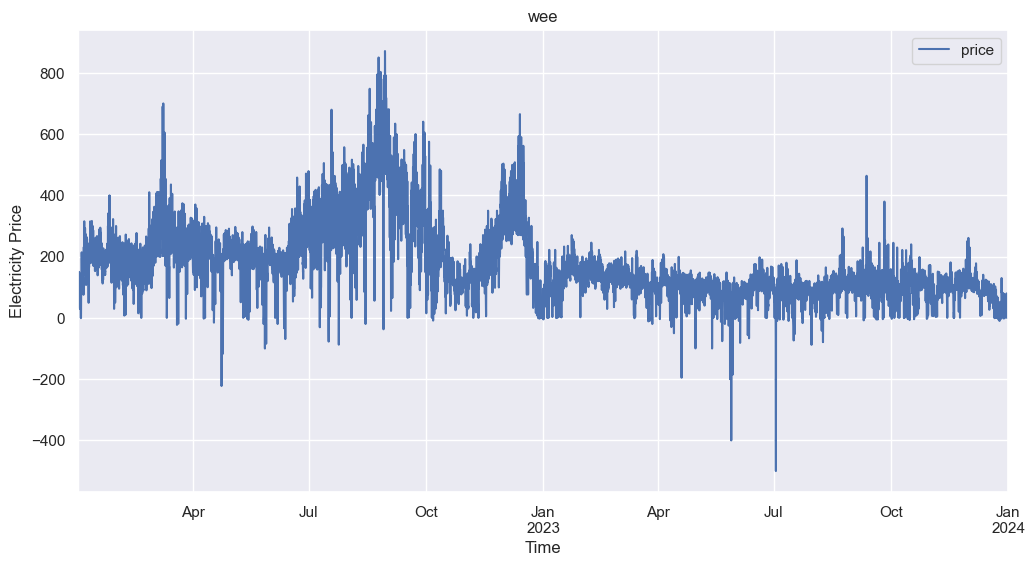

In [68]:
e_df.plot(y='price', figsize=(12, 6))
plt.ylabel('Electricity Price')
plt.title('wee')
plt.show()

# Step 2: Differencing the data to make it stationary (optional, based on the data)
# df['price_diff'] = df['price'].diff().dropna()

# # Step 3: Fit ARIMA model
# # The order here is (p, d, q) -> p: AR lag, d: differencing, q: MA lag
# model = ARIMA(df['price'], order=(5, 1, 0))  # Adjust p, d, q based on your analysis
# model_fit = model.fit()

# # Step 4: Print summary of the model
# print(model_fit.summary())

# # Step 5: Plot the residuals to check model fit
# residuals = model_fit.resid
# residuals.plot()
# plt.title('Residuals')
# plt.show()

In [ ]:
e_df[e_df.index.duplicated()]

/var/folders/8k/8n8mf6jn28537sc4vvz36rhh0000gn/T/ipykernel_6532/3125075512.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  e_df = e_df.asfreq('H')


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17520
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -82293.404
Date:                Sun, 06 Oct 2024   AIC                         164602.808
Time:                        20:00:45   BIC                         164664.977
Sample:                    01-01-2022   HQIC                        164623.279
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2267      0.004     61.816      0.000       0.220       0.234
ar.L2          0.0367      0.004      8.771      0.000       0.028       0.045
ar.L3         -0.0968      0.005    -21.063      0.0

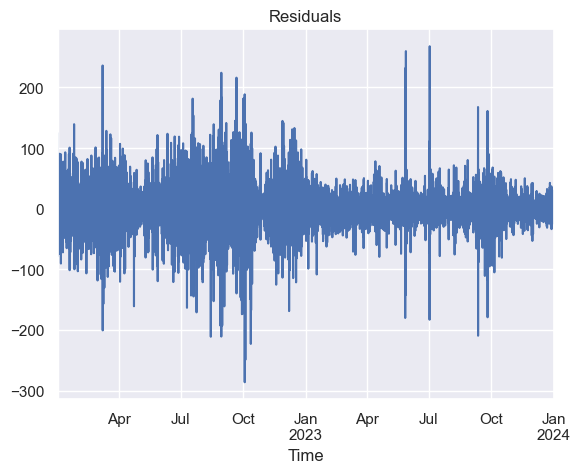

In [66]:
import pandas as pd

# Assuming df has a datetime index

# Check for duplicate indices
if e_df.index.duplicated().any():
    print("Found duplicates, removing them...")

    # Option 1: Drop duplicates, keep first occurrence
    e_df = e_df[~e_df.index.duplicated(keep='first')]

    # Option 2: If you prefer, take the mean of the duplicates
    # df = df.groupby(df.index).mean()

# Set the frequency to hourly after handling duplicates
e_df = e_df.asfreq('H')

# Proceed with analysis or modeling
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(e_df['price'], order=(7, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

# Step 5: Plot the residuals to check model fit
residuals = model_fit.resid
residuals.plot()
plt.title('Residuals')
plt.show()

In [57]:

# Step 2: Differencing the data to make it stationary (optional, based on the data)
e_df['price_diff'] = e_df['price'].diff().dropna()

# Step 3: Fit ARIMA model
# The order here is (p, d, q) -> p: AR lag, d: differencing, q: MA lag
model = ARIMA(e_df['price'], order=(7, 1, 0))  # Adjust p, d, q based on your analysis
model_fit = model.fit()

# Step 4: Print summary of the model
print(model_fit.summary())

# Step 5: Plot the residuals to check model fit
residuals = model_fit.resid
residuals.plot()
plt.title('Residuals')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

In [11]:
price = hourly_stats_wide
price
price.to_csv('output/price.csv')

## Generation 

In [9]:
e_g = pd.read_pickle('output/daf_solar_wind_22_23.pkl')

In [36]:
e_g.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   solar          17520 non-null  int64
 1   wind_offshore  17520 non-null  int64
 2   wind_onshore   17520 non-null  int64
dtypes: int64(3)
memory usage: 547.5 KB


In [37]:
# Create a new column for the hour of the day
e_g['hour'] = e_g.index.hour

In [38]:
solar_g = e_g[['solar', 'hour']]
wind_off = e_g[['wind_offshore', 'hour']]
wind_on = e_g[['wind_onshore', 'hour']]

In [39]:
solar_g.head()

,solar,hour
Date,,
2022-01-01 01:00:00,0,1
2022-01-01 02:00:00,0,2
2022-01-01 03:00:00,0,3
2022-01-01 04:00:00,0,4
2022-01-01 05:00:00,0,5


In [40]:
def hourly_report(df, col):
    # Group by hour and apply the aggregation function
    hourly_stats = df.groupby('hour')[col].apply(aggregate_stats)
    
    # Convert the result into a DataFrame
    hourly_stats_df = pd.DataFrame(hourly_stats.tolist(), index=hourly_stats.index)
    
    return hourly_stats_df.unstack()

In [42]:
solar = hourly_report(solar_g, 'solar')
solar
solar.to_csv('output/solar.csv')


In [43]:
off = hourly_report(wind_off, 'wind_offshore')
off
off.to_csv('output/off.csv')

In [44]:
on = hourly_report(wind_on, 'wind_onshore')
on
on.to_csv('output/on.csv')

In [45]:
solar.head()

0                       
     mean  std skewness kurtosis
hour                            
0     0.0  0.0      NaN      NaN
1     0.0  0.0      NaN      NaN
2     0.0  0.0      NaN      NaN
3     0.0  0.0      NaN      NaN
4     0.0  0.0      NaN      NaN

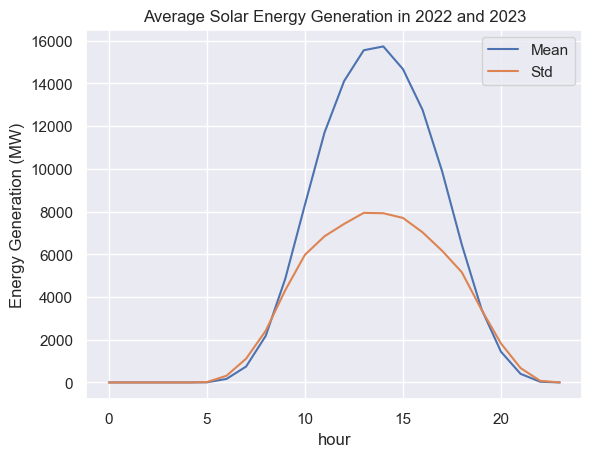

In [50]:
sns.lineplot(solar[0]['mean'], label = 'Mean').set_title('Average Solar Energy Generation in 2022 and 2023')
sns.lineplot(solar[0]['std'], label = 'Std')
plt.ylabel("Energy Generation (MW)")
plt.legend()

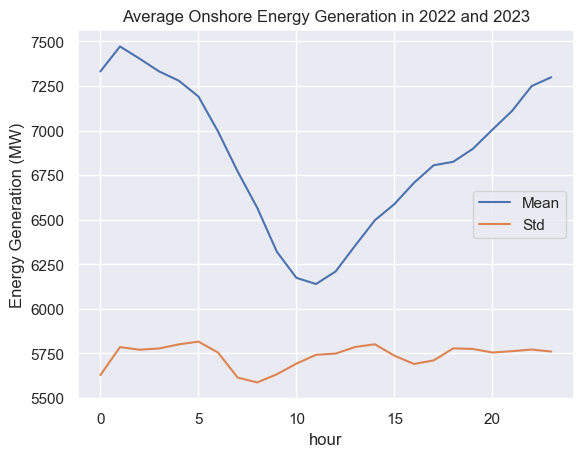

In [51]:
sns.lineplot(on[0]['mean'], label = 'Mean').set_title('Average Onshore Energy Generation in 2022 and 2023')
sns.lineplot(on[0]['std'], label = 'Std')
plt.ylabel("Energy Generation (MW)")
plt.legend()

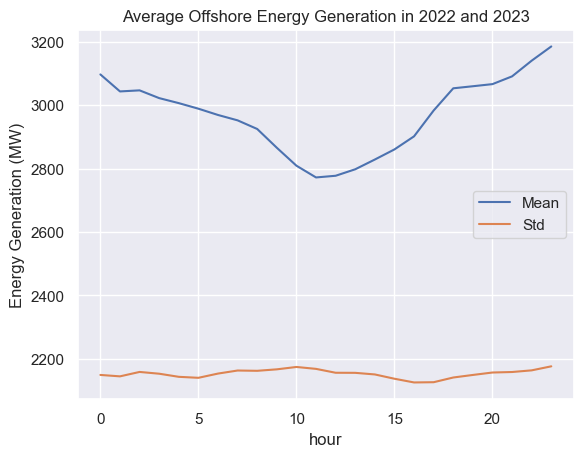

In [52]:
sns.lineplot(off[0]['mean'], label = 'Mean').set_title('Average Offshore Energy Generation in 2022 and 2023')
sns.lineplot(off[0]['std'], label = 'Std')
plt.ylabel("Energy Generation (MW)")
plt.legend()

## Total Load

In [21]:
d_load = pd.read_pickle('output/df_fore_total_load_22_23.pkl')

In [22]:
d_load['hour'] = d_load.index.hour

In [23]:
d_load.head()

,quantity,hour
Date,,
2022-01-01 01:00:00,46129,1
2022-01-01 02:00:00,44340,2
2022-01-01 03:00:00,43222,3
2022-01-01 04:00:00,42705,4
2022-01-01 05:00:00,42576,5


In [24]:

fore_load = hourly_report(d_load, 'quantity')
fore_load
fore_load.to_csv('output/load.csv')

In [17]:
df =  pd.concat([e_g, e_df], axis= 1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [16]:
df.tail()

,solar,wind_offshore,wind_onshore,price
2023-12-31 20:00:00,NaN,NaN,NaN,39.64
2023-12-31 21:00:00,NaN,NaN,NaN,34.89
2023-12-31 22:00:00,NaN,NaN,NaN,13.30
2023-12-31 23:00:00,NaN,NaN,NaN,10.68
2024-01-01 00:00:00,NaN,NaN,NaN,3.17


In [13]:
e_df.head()

,price
Time,
2022-01-01 01:00:00,124.70
2022-01-01 02:00:00,124.70
2022-01-01 03:00:00,134.00
2022-01-01 04:00:00,58.80
2022-01-01 05:00:00,37.67


In [20]:
e_df.shape

(17520, 1)

In [21]:
e_g.shape

(17520, 3)

In [23]:
# Find duplicated indices
duplicated_indices = e_df.index[e_df.index.duplicated(keep=False)]

# Print the duplicated indices
print("\nDuplicated Indices:")
print(duplicated_indices)


Duplicated Indices:
DatetimeIndex(['2022-10-31 01:00:00', '2022-10-31 01:00:00',
               '2023-10-30 01:00:00', '2023-10-30 01:00:00'],
              dtype='datetime64[ns]', name='Time', freq=None)


In [18]:
print(e_df.index.is_unique)  # Should return True for a unique index


False


In [19]:
print(e_g.index.is_unique)

True
